## @yullano90 | M ● Funções e Parâmetros

In [ ]:
#Vamos falar sobre o editor de consultas do Power BI?:

=> Power Query é uma tecnologia de Conectividade e Preparação de Dados , crucial no ETL;
=> Possui mais de 300 funcionalidades para ETL sem necessidade de utilização de código;
=> Possibilita acesso a centenas de fontes de dados diferentes;

#O que veremos por aqui?:

=> Etapas de Transformações;
=> Agregações;
=> Criação de colunas personalizadas e condicionais;
=> Criação e invocação de funções personalizadas;
=> Criação e utilização de parâmetros em etapas de transformação;
=> Dependências de consultas;
=> Configurações de fontes de dados(encoding, directórios, arquivos, etc);
=> "Portabilidade de código" entre produtos integrados do Power Query:
    
        => Microsoft Power BI
        => Microsoft Excel
        => Microsoft SQL Server Data Tools for Visual Studio
        => Microsoft Common Data Service for Apps    


#Tudo que é feito no Power Query será automaticamente transformada em código da Linguagem M.(Como macros no VBA do excel).
#Importante entender que a construção de Dashboards não é a única etapa em BI, temos algo antes muito importante, o ETL.

In [ ]:
#Objeto JSON de exemplo:

---------------------------------------------------------------------------------------------------------------
let
    Json_Exemplo_01 =
    Table.FromRows(Json.Document(Binary.Decompress(Binary.FromText(
        "hZLRSsMwFIZfJfS6Ytq1WXs5NiYDhaEiyNjFsY0uo01K2g72PF6IAy99gr6YOcnqdIwtlNM/ycmXnD9ZLLxZ1e2uRiVoXigyyiD
        n5dbzvdPf0l94U6VL6D66d0XGgstG1A2QnJMJ5Ko+u/IOGt19ZW0BNamUJmW3q4lUpNKi5EIrUvOS143miAtpGJylnZ0ct7pWpvM
        EhdLmP5OG2zZWr0FeB6kRr3zjhKneCXjR/YhwYt3aZGTOt81KSTJtZQ6lKdxWG1PqU2rEc1sUYIp5gP1MgqNJjCE0IUXaALsRtbj
        7I1LSk27MKQQvDqQh7XEphgghATLjva3ZSkhObjloKeQbztIeNoGNOJDc/hhCXB9aZQ82uOzpo2qgwKux5lqc2+NSvjE/08I8mW/
        uLr7i5h2oXP3mB9anMEBakEYYGR5ryDAkrszuMxdwkjc/5rHAZ64Ne/9Y9HcoZv5g36wP/3rMWy5/AA==",
        BinaryEncoding.Base64), Compression.Deflate)),
                    
    let _t = ((type nullable text) meta [Serialized.Text = true])
    in type table [C1 = _t, C2 = _t, C3 = _t, C4 = _t, C5 = _t, C6 = _t, C7 = _t, C8 = _t, C9 = _t])
in
    Json_Exemplo_01
---------------------------------------------------------------------------------------------------------------
    
    
    
#Arquivo TXT/CSV de exemplo:

Ipê-Amarelo Academy								
Formação Cientista de Dados								
Matrículas por mês no primeiro semestre de 2021								
								
Curso	Valor	Instrutor	jan/21	fev/21	mar/21	abr/21	mai/21	jun/21
Python Fundamentos	500,00	Yullano Santos	80	85	82	99	35	40
R Fundamentos	800,00	Gabriel Santos	70	80	90	45	12	5
Machine Learning	1000,00	Davi Santos	35	45	22	25	29	33
								
Total de Cursos	3,00							
Total de Inscrições por período			185	210	194	169	76	78
Média de Inscrições por Período			61,66666667	70	64,66666667	56,33333333	25,33333333	26


#No "pequenino" dataset acima rsrs, precisamos fazer transformações necessárias.
#Ao mesmo tempo, vamos compreendendo a interface gráfica. Simbora?

In [ ]:
#PÁGINA INICIAL:
    
    => Recurso: "Qualidade da Coluna";
        
    => Exclusão de linhas desnecessárias;
    
    => Promoção de Cabeçalhos;
    
    => Pivotamento de Colunas;
    
    => Substituição de valores;
    
    => Inserção de etapa intermediária trocando "null" por 0:
        #(Explicando o impacto que uma etapa intermediária pode causar);
        #(Explicar impacto de fazer substituição parcial de dados missing #pois sumirão da base)
        #(Exemplo:
        
        --------------------------------------------------------------------------
            Table.RapleceValue(
                                "EtapaAnterior", null, 0, Replacer.ReplaceValue,{
                                    "01/01/1990", #"01/02/1999"#
                                }
                            )
                        )
         --------------------------------------------------------------------------       

    => Aplicação de filtros;
    
    => Agrupamento de Dados em "Agrupar por";

In [ ]:
#MENU ADICIONAR COLUNA:
    
    => Coluna de exemplos;
    
    => Time Intelligence via interface (Mês, Ano e etc.)
    
    => Dividir "Nome" e "Sobrenome" do instrutor por delimitador:
        
    => Colunas Personalizada e erros(Cuidado com o status "Nenhum erro de sintaxe" rsrs):
        
        -------------------------------------------------------------------------
        Errado: [Nome] + [Sobrenome]
            
        Correto: [Nome]&" "&[Sobrenome] OU Text.Combine({[Nome]," ",[Sobrenome]})
        --------------------------------------------------------------------------             

## A tabela final precisa conter 18 linhas e 07 colunas:

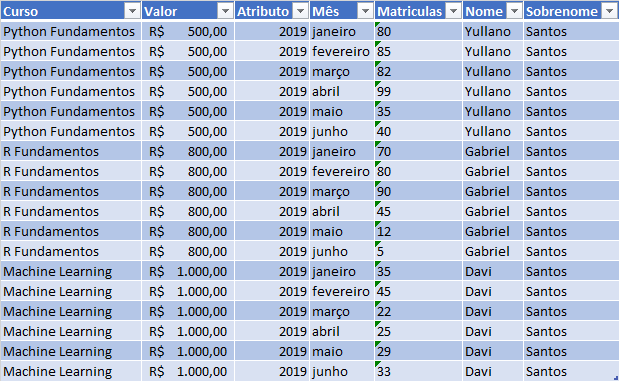

## Funções Personlizadas:

In [ ]:
#PÁGINA INCIAL >> INVOCAR FUNÇÃO PERSONALIZADA:

        1. Crie uma consulta nula;
        2. Crie dois parâmetros e os tipifique. Declare-os antes do "Let";
        3. Crie uma variável produto e armazene nela o produto dos parâmetros;
        
           --------------------------------------------------------------------------
            (valorCurso as number, qtdeMatriculas as number) =>
            let
                produto = (valorCurso * qtdeMatriculas)
            in
                produto
            --------------------------------------------------------------------------    
    
        3. Teste a interface gerada(várias vezes);
        4. Nomeie a função com "ValorRecebido"
        5. Invoque ela na Interface da coluna personalizada;
        6. Faça a soma pra checar se o valor final é : 641.100;
            
            
            

## Aplicação e Gerenciamento de Parâmetros:

### Cenário de Cálculo:

In [ ]:
#PÁGINA INCIAL >> GERENCIAR PARÂMETROS:

    1. Crie uma parâmetro de desconto chamado "TaxaDesconto" no valor de R$ 49,99:
    2. Aplique o "TaxaDesconto" na função "ValorRecebido";
    
    
    ----------------------------------------------------------------------------------
    
    49.99 meta [IsParameterQuery=true, Type="Number", IsParameterQueryRequired=false]
    
    ----------------------------------------------------------------------------------
    
    (valorCurso as number, qtdeMatriculas as number) =>
    let
    produto = (valorCurso * qtdeMatriculas) - #TaxaDesconto
    in
        produto
        
    ----------------------------------------------------------------------------------
    
    
    3. Verifique se as alterações geraram uma Soma final de: 640.200,18; 
        
        
        

### Cenário de Filtragem:

In [ ]:
#PÁGINA INCIAL >> GERENCIAR PARÂMETROS:


    1. Crie parâmetro "ExportarCurso" e coloque "Machine Learning":
        
        --------------------------------------------------------------------------------------------
        "Machine Learning" meta [IsParameterQuery=true, Type="Text", IsParameterQueryRequired=true]
        --------------------------------------------------------------------------------------------
    
    2. Insira essa step com o parâmetro:
        
        ---------------------------------------------------------------------------------------------  
        EtapaAtual = Table.SelectRows(EtapaAnterior, each [Curso] = ExportarCurso)
        ---------------------------------------------------------------------------------------------
         

## Configuração de fonte de dados local e global

In [1]:
#(exemplos espontâneos básicos)

In [ ]:
#Locais importantes da Interface Power BI (padrão certificação):
    
=> ReportView;

=> DataView;

=> RelationShipView;
